In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv("hr_data.csv")

In [43]:
data.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [45]:
#dummies = pd.get_dummies(data['DOJ Extended'],drop_first=True)
#df_onehot = pd.concat([dummies,data], axis = 1)
#df_onehot.drop("DOJ Extended",axis=1,inplace=True)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
data['DOJ Extended'] = le.fit_transform(data['DOJ Extended'])

In [46]:
data['Offered band'] = le.fit_transform(data['Offered band'])

In [47]:
cols = ['Joining Bonus','Candidate relocate actual','Gender','Candidate Source','LOB','Location','Status']
for col in cols:
    data[col] = le.fit_transform(data[col])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   int32  
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   int32  
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   int32  
 10  Candidate relocate actual    8995 non-null   int32  
 11  Gender                       8995 non-null   int32  
 12  Candidate Source             8995 non-null   int32  
 13  Rex in Yrs        

In [49]:
data.drop("SLNO",axis=1,inplace=True)

In [50]:
data

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34,0
1,2112635,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34,0
2,2112838,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27,0
3,2115021,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34,0
4,2115125,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,3822427,0,4,0,1,191.67,191.67,0.00,0,0,1,2,1,4,2,34,0
8991,3828206,1,2,0,1,150.00,150.00,0.00,0,0,0,1,3,1,2,34,0
8992,3834159,0,0,0,2,35.42,35.42,0.00,0,0,1,1,5,7,8,34,0
8993,3835433,0,0,30,1,76.92,53.85,-13.04,0,0,1,1,4,7,8,34,0


In [51]:
data = (data-data.min()) / (data.max() - data.min())
data

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,0.000476,1.0,0.062500,0.250,0.666667,0.112086,0.138525,0.299861,0.0,0.0,0.0,0.0,0.291667,0.500,0.8,0.350,0.0
1,0.001766,0.0,0.080357,0.250,0.666667,0.277252,0.715336,0.673265,0.0,0.0,1.0,1.0,0.333333,0.875,0.2,0.350,0.0
2,0.001884,0.0,0.013393,0.375,0.666667,0.260546,0.194319,0.183162,0.0,0.0,1.0,0.0,0.166667,0.875,0.8,0.175,0.0
3,0.003148,0.0,0.116071,0.250,0.666667,0.260546,0.194319,0.183162,0.0,0.0,1.0,1.0,0.166667,0.875,0.8,0.350,0.0
4,0.003208,1.0,0.004464,1.000,0.666667,0.259963,0.193849,0.183162,0.0,1.0,1.0,1.0,0.250000,0.875,0.8,0.350,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,0.992094,0.0,0.017857,0.000,0.333333,0.607793,0.474096,0.183162,0.0,0.0,1.0,1.0,0.041667,0.500,0.2,0.350,0.0
8991,0.995442,1.0,0.008929,0.000,0.333333,0.510569,0.395763,0.183162,0.0,0.0,0.0,0.5,0.125000,0.125,0.2,0.350,0.0
8992,0.998890,0.0,0.000000,0.000,0.666667,0.243234,0.180371,0.183162,0.0,0.0,1.0,0.5,0.208333,0.875,0.8,0.350,0.0
8993,0.999628,0.0,0.000000,0.250,0.333333,0.340061,0.215016,0.147657,0.0,0.0,1.0,0.5,0.166667,0.875,0.8,0.350,0.0


In [52]:
from sklearn.model_selection import train_test_split
X = data.drop(['Status'],axis=1)
Y = data['Status']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [53]:
#ANN
import tensorflow as tf
from tensorflow import keras

In [54]:
X_train.shape

(7196, 16)

In [55]:
model = keras.models.Sequential()
activation = 'relu'
model.add(keras.layers.Flatten(input_shape=[16]))
model.add(keras.layers.Dense(16,activation=activation))
model.add(keras.layers.Dense(8,activation=activation))
model.add(keras.layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(loss="BinaryCrossentropy",optimizer="adam",metrics=["accuracy"])

In [57]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 40)

Epoch 1/40
225/225 [==============================] - 3s 7ms/step - loss: 0.5061 - accuracy: 0.8011 - val_loss: 0.4550 - val_accuracy: 0.8149
Epoch 2/40
225/225 [==============================] - 1s 5ms/step - loss: 0.4537 - accuracy: 0.8125 - val_loss: 0.4382 - val_accuracy: 0.8149
Epoch 3/40
225/225 [==============================] - 1s 5ms/step - loss: 0.4406 - accuracy: 0.8125 - val_loss: 0.4291 - val_accuracy: 0.8149
Epoch 4/40
225/225 [==============================] - 1s 5ms/step - loss: 0.4337 - accuracy: 0.8125 - val_loss: 0.4241 - val_accuracy: 0.8149
Epoch 5/40
225/225 [==============================] - 1s 5ms/step - loss: 0.4298 - accuracy: 0.8125 - val_loss: 0.4214 - val_accuracy: 0.8149
Epoch 6/40
225/225 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.8125 - val_loss: 0.4194 - val_accuracy: 0.8149
Epoch 7/40
225/225 [==============================] - 1s 5ms/step - loss: 0.4254 - accuracy: 0.8125 - val_loss: 0.4184 - val_accuracy: 0.8149
Epoch 

57/57 [==============================] - 0s 4ms/step
accuracy : 0.8198999444135631
precision : 0.5692307692307692
recall : 0.1111111111111111


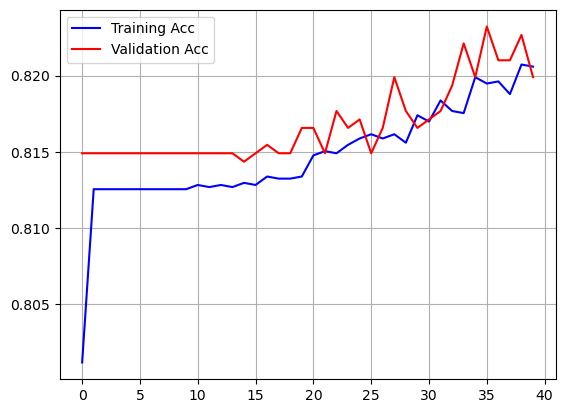

In [58]:
plt.plot(history.history["accuracy"],c='b')
plt.plot(history.history["val_accuracy"],c='r')
plt.grid()
plt.legend(["Training Acc","Validation Acc"])

import sklearn.metrics as metrics
y_pred = model.predict(X_test)
#print(y_pred)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

acc = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)

print(f'accuracy : {acc}')
print(f'precision : {precision}')
print(f'recall : {recall}')